## 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 데이터 형태 확인

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
len(train_labels)

60000

In [ ]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
test_images.shape # 3차원 배열

(10000, 28, 28)

In [ ]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## 신경망 구조

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'), # 입력
    layers.Dense(10, activation='softmax') # 출력, 10이 의미하는 것은 예측할 범주의 개수
])

## 컴파일 단계
- 어떤 형태로 훈련을 시킬 것이냐를 정의
- 경사하강법 : 기울기를 찾는데, step을 어떤 식으로 할지 정의하는 것
- 경사하강법의 종류도 되게 많음

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## 이미지 데이터 준비
- 데이터를 모델에 맞는 크기로 변경
  - 이 때, 데이터타입 변경(연산할 때, 데이터 타입 미 매칭으로 인한 오류)
  - 기본값 float64, 텐서플로 기본값 float32

In [ ]:
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype('float32') / 255 # 28*28 = 784의 사이즈를 [0, 255]로 rescale해주는 것을 의미
test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype('float32') / 255 # 28*28 = 784의 사이즈를 [0, 255]로 rescale해주는 것을 의미

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2634 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1073 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0706 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0515 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9882


In [ ]:
test_digits = test_images[0:5]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 61ms/step


array([4.5954273e-08, 6.3413863e-10, 1.3094364e-05, 2.7750710e-05,
       6.8706915e-11, 3.8352244e-08, 2.0191021e-12, 9.9995744e-01,
       5.0604402e-08, 1.5968105e-06], dtype=float32)

In [ ]:
predictions[0][7]

0.99995625

In [ ]:
test_labels[0]

7

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9800
테스트 정확도 0.9800000190734863


- 정형데이터를 활용할 경우 뭐가 더 좋을까
  - 전통적인 머신러닝(LightGBM, 선형회귀)
  - 최신 딥러닝

- 알고리즘 차이
  - 딥러닝 : 궁극적인 목적은 기울기 찾아서 오차 최소화, 해석이 굉장히 난해해짐.
- 이미지, 텍스트 비정형데이터
  - 굳이 해석이 필요할까

## 기본문법

### 스칼라(랭크-0 텐서)

In [ ]:
import numpy as np
x = np.array(12)  # 스칼라 (값 1개)
x

array(12)

In [ ]:
x.ndim

0

### 벡터(랭크-1 텐서)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.shape, x.ndim # 1차원 배열 = 랭크 1 텐서 = 벡터

((5,), 1)

### 행렬(랭크-2 텐서)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.shape, x.ndim # 2차원 배열 = 랭크 2 텐서 = 행렬

((3, 5), 2)

### 랭크-3텐서와 더 높은 랭크의 텐서

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.shape, x.ndim

((3, 3, 5), 3)

## 데이터 다시보기

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

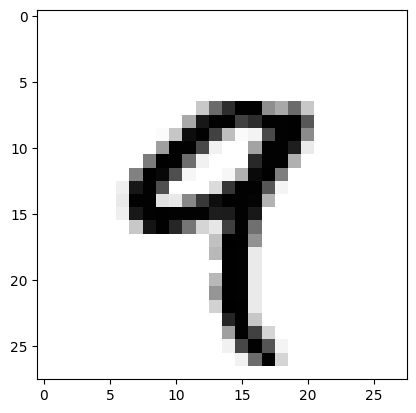

In [ ]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

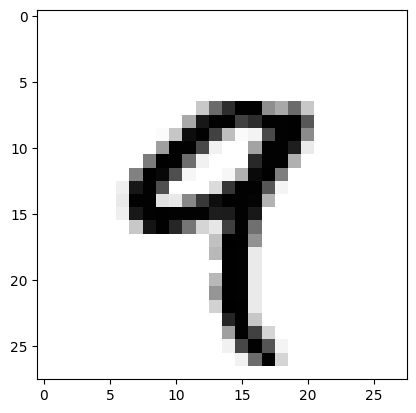

In [ ]:
fig, ax = plt.subplots()
ax.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

## Numpy로 텐서 조작하기(슬라이싱)

In [ ]:
my_slice = train_images[10:100] # 10번째부터 100번째까지 90개 이미지를 가져옴
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :] # 위와 같은 의미
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28] # 위와 같은 의미
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]  # 이미지 전체를 오른쪽 아래부분만 가져옴
my_slice.shape

(60000, 14, 14)

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7] # 이미지 전체를 가운데 부분만 가져옴
my_slice.shape

(60000, 14, 14)

## 배치 데이터
- 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다!
- 대신 데이터를 작은 배치로 나눔!

In [ ]:
batch = train_images[:128] # 이미지 갯수를 나눔

## 텐서 연산

In [ ]:
# keras.layers.Dense(512, activation='relu')

In [ ]:
# relu 함수 구현
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy() # 입력 텐서 자체를 바꾸지 않고 복사한다. 기존 x값에 영향이 없게 하기 위해
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

def naive_add(x, y):
  assert len(x.shape) == 2 # 2차원 배열
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

- 원소별 연산

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
  z = x + y # 각각 원소별 덧셈
  z = np.maximum(z, 0) # 원소별 렐루 함수
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.61 s


## 브로드캐스팅
- 참고 : https://numpy.org/doc/stable/user/basics.broadcasting.html

In [ ]:
import numpy as np
X = np.random.random((32, 10)) # X는 크기가 32, 10인 2차원 행렬
y = np.random.random((10, )) # y는 1차원 벡터

y.shape, y.ndim

((10,), 1)

In [ ]:
y = np.expand_dims(y, axis=0) # y는 크기가 1, 10인 2차원 행렬
y.shape, y.ndim

((1, 10), 2)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape, y.ndim

((32, 10), 2)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
# p79
import numpy as np
x = np.random.random((64, 3, 32, 10)) # 4차원
y = np.random.random((32, 10)) # 배열 다름 2차원
z = np.maximum(x, y) # 차원이 서로 다른 x와 y사이에서 4차원으로 연산이 완료됨

In [ ]:
z.shape, x.shape

((64, 3, 32, 10), (64, 3, 32, 10))

## 텐서 곱셈

In [ ]:
# 행렬곱셈 np.dot p79
x = np.random.random((32, ))
y = np.random.random((32, ))
z = np.dot(x, y)
z

7.256398739107038

- 점곱 연산 함수를 만듬

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
naive_vector_dot(x, y)

7.25639873910704

- 행렬과 벡터를 행렬곱 하는 메서드를 만듬

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # 2차원 행렬
    assert len(y.shape) == 1 # 1차원 벡터
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

- 기존에 만든 함수를 재사용해서 표현

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

- 행렬곱 연산 함수를 구현함

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

- 결론은, 텐서플로는 행렬곱 연산을 기반으로 한다!

In [ ]:
x = np.random.random((64, 32))
y = np.random.random((32, 16))
z = np.random.random((16, 8))

result = naive_matrix_dot(x, y)
naive_matrix_dot(result, z)

array([[ 71.12695274,  77.63108622,  55.39330226,  65.8457206 ,
         76.39896175,  96.93527861,  61.7936101 ,  60.76063655],
       [ 69.38688667,  75.75956515,  54.42127738,  63.83021481,
         72.9635528 ,  94.47641423,  58.21411182,  59.08267402],
       [ 62.98490131,  68.8447134 ,  48.81399554,  58.03143939,
         67.42919916,  85.84384408,  54.73785547,  53.53455649],
       [ 62.39535875,  66.92479221,  47.97290288,  57.73018965,
         64.67489935,  82.25496465,  52.54630184,  51.0859158 ],
       [ 78.78528887,  86.22800243,  60.6853677 ,  72.67877926,
         83.87024774, 108.03656955,  67.46911511,  67.42296673],
       [ 76.53426012,  85.11852964,  60.34290931,  71.48442933,
         82.63740779, 106.25724166,  65.87705479,  66.25268627],
       [ 59.30242488,  65.10718174,  46.05864268,  55.89616481,
         63.13788098,  81.28842958,  50.6491047 ,  50.44617773],
       [ 58.17062732,  64.63856845,  46.20398953,  53.27232264,
         61.07629635,  80.0026530

In [ ]:
print(result.shape)

(64, 16)


## 텐서 크기 변환

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x.reshape(1,6)

array([[0., 1., 2., 3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)